In [1]:
import numpy as np 
import matplotlib.pyplot as plt 

import DAQSimulator
import EventGenerator
import LAPPDStation

#plt.style.use("~/evanstyle.mplstyle")

In [14]:
egen = EventGenerator.EventGenerator("configs/example.yml")
eLAPPD1 = LAPPDStation.LAPPDStation("configs/example.yml")

In [15]:
egen.generate_particle_times(1)
eLAPPD1.generate_noise_times(1)
eLAPPD1.reconcile_times(egen, 1)

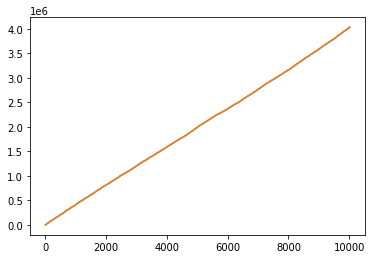

In [21]:
plt.plot(eLAPPD1.allTimes[0])
plt.plot(eLAPPD1.allDeadTimes[0])

In [22]:
eventsPassingTrigger = np.count_nonzero((eLAPPD1.eventClass[0] == 1) & eLAPPD1.passTrigger[0])
eventsPassingTriggerAndSaved = np.count_nonzero((eLAPPD1.eventClass[0] == 1) & eLAPPD1.passTrigger[0] & eLAPPD1.acceptMasks[0])
print("Events saved:", eventsPassingTriggerAndSaved, "/", eventsPassingTrigger, "=", float(eventsPassingTriggerAndSaved)/eventsPassingTrigger)

Events saved: 6827 / 7958 = 0.85787886403619
